In [6]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split

# We generate 1000 points, with 2 features, and 2 classes
# Let's pick a center for each class
center1 = np.array([0, 0])
center2 = np.array([1, 1])
# We generate 500 points around each center, distributed normally
data1 = np.random.normal(loc=center1, # mean
scale=(0.5, 0.3), # std deviation
size=(500, 2))
data2 = np.random.normal(loc=center2, # mean
scale=(0.3, 0.5), # std deviation
size=(500, 2))
# We create the labels
labels1 = np.zeros(500)
labels2 = np.ones(500)
# We concatenate the data and the labels
data1 = np.concatenate((data1, labels1.reshape(-1, 1)), axis=1)
data2 = np.concatenate((data2, labels2.reshape(-1, 1)), axis=1)
# We concatenate the two classes
data = np.concatenate((data1, data2), axis=0)
# We shuffle the data
np.random.shuffle(data)
# We split the data into train, and test sets
train, test = train_test_split(data, test_size=0.2)
# (optional)
# We make a dataframe to plot the data, with columns x, y, label, set
train_df = pandas.DataFrame(train, columns=['x', 'y', 'label'])
train_df['set'] = 'train'
test_df = pandas.DataFrame(test, columns=['x', 'y', 'label'])
test_df['set'] = 'test'
data_df = pandas.concat([train_df, test_df], axis=0)
del train_df, test_df
# We save the data
np.save('./data/generated_data.npy', data)
np.save('./data/generated_data_train.npy', train)
np.save('./data/generated_data_test.npy', test)
data_df.to_csv('./data/generated_data.csv', index=False)

You can visualise the dataset with the below code snippet

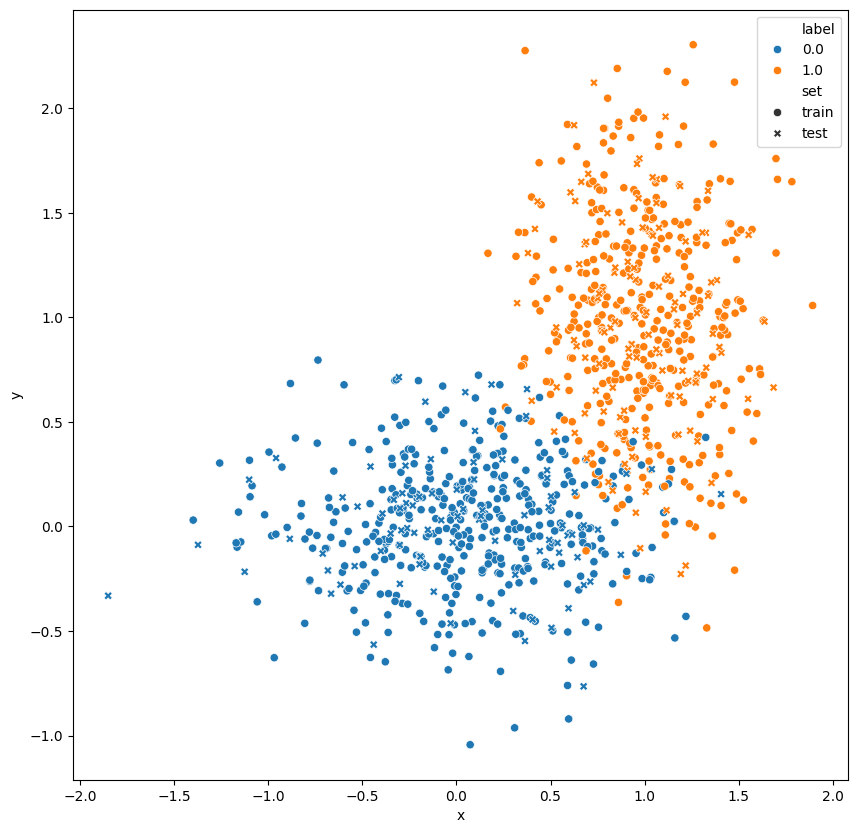

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='x', y='y', hue='label', style='set', data=data_df)
plt.show()